In [8]:
import sqlite3
import pandas as pd
import sys
import os
# Add the main project directory to sys.path
sys.path.append(os.path.abspath(".."))

from helper import get_connection


import matplotlib.pyplot as plt
import folium

In [9]:
conn = get_connection("../buienradar_weather.db")
# Query stations and latest temperature
query = """
SELECT ws.stationid, ws.stationname, ws.lat, ws.lon, wsm.temperature
FROM weather_stations ws
JOIN (
    SELECT stationid, MAX(timestamp) as latest_ts
    FROM weather_station_measurements
    GROUP BY stationid
) latest ON ws.stationid = latest.stationid
JOIN weather_station_measurements wsm
    ON ws.stationid = wsm.stationid AND wsm.timestamp = latest.latest_ts
"""

df = pd.read_sql(query, conn)
conn.close()

print(df.head())

   stationid             stationname    lat   lon  temperature
0       6391       Meetstation Arcen  51.50  6.20         15.0
1       6275      Meetstation Arnhem  52.07  5.88         14.3
2       6249    Meetstation Berkhout  52.65  4.98         14.5
3       6260     Meetstation De Bilt  52.10  5.18         14.3
4       6235  Meetstation Den Helder  52.92  4.78         14.2


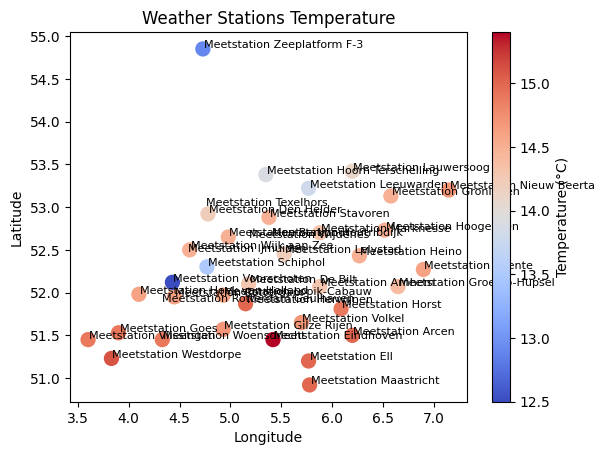

In [10]:
plt.scatter(df['lon'], df['lat'], c=df['temperature'], cmap='coolwarm', s=100)
for _, row in df.iterrows():
    plt.text(row['lon']+0.01, row['lat']+0.01, row['stationname'], fontsize=8)
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Weather Stations Temperature')
plt.show()

In [11]:
# Create a map centered roughly at the Netherlands
m = folium.Map(location=[52.0, 5.0], zoom_start=7)

# Add stations as circle markers, colored by temperature
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        popup=f"{row['stationname']}: {row['temperature']}°C",
        color='red' if row['temperature'] > 20 else 'blue',
        fill=True,
        fill_color='red' if row['temperature'] > 20 else 'blue'
    ).add_to(m)

# Save to HTML
m.save("station_map.html")